<a href="https://colab.research.google.com/github/MayJarung/IMAGE-PROCESSING/blob/main/Lab4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras wrappers

  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/81/fd/e3859be14b9feda7e11c719d7ffc5288e73664f9224be71fdb97cbd2d4ee/wrappers-0.1.9.tar.gz (from https://pypi.org/simple/wrappers/): Requested wrappers-fef2881dabe04760977a67ae795ff796 from https://files.pythonhosted.org/packages/81/fd/e3859be14b9feda7e11c719d7ffc5288e73664f9224be71fdb97cbd2d4ee/wrappers-0.1.9.tar.gz has inconsistent name: expected 'wrappers', but metadata has 'wrappers-fef2881dabe04760977a67ae795ff796'
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/a6/8b/631b7d172369efdb26fd34adb2f56233da40665b7b4e99dac11846b154fd/wrappers-0.1.8.tar.gz (from https://pypi.org/simple/wrappers/): Requested wrappers-f802aac175e748b3be4b6c6066b6bb7d from https://files.pythonhosted.org/packages/a6/8b/631b7d172369efdb26fd34adb2f56233da40665b7b4e99dac11846b154fd/wrappers-0.1.8.tar.gz has inconsistent name: expected 'wrappers', but metadata has 'wrappers-f802aa

In [ ]:
!pip install keras==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.9.0 which is incompatible.


In [ ]:
#Array, image processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# io
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/ImageProcessing/face_mini.zip'
extract_path = '/content/drive/MyDrive/ImageProcessing/NewExtractImage'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
#import img from file image_mini
files = glob.glob('/content/drive/MyDrive/ImageProcessing/NewExtractImage/**/*.jpg', recursive = True)
normalized_images = []
for file in files:
  img = load_img(file, target_size=(100, 100), interpolation='nearest')
  img = img_to_array(img)
  img /= 255.0
  normalized_images.append(img)

In [ ]:
# แบ่งชุดข้อมูลเป็น Training_data, Testing_data (70 : 30)
train_x, test_x = train_test_split(normalized_images, random_state=42, test_size=0.3)

In [ ]:
# แบ่งชุดข้อมูล Training_data เป็น Training_data, Validation_data (80:20)
train_x, val_x = train_test_split(train_x, random_state=42, test_size=0.2)

In [ ]:
train_x_np_array = np.array(train_x)
test_x_np_array = np.array(test_x)
val_x_np_array = np.array(val_x)

In [ ]:
# parameter
noise_mean = 0
noise_std = 0.5
noise_factor = 0.3

In [ ]:
# train, validate, test noise จาก parameter ที่อาจารย์กำหนดให้
train_x_noise = train_x_np_array + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )
val_x_noise = val_x_np_array + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )
test_x_noise = test_x_np_array + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )

In [ ]:
train_x_noise_np_array = np.array(train_x_noise)
val_x_noise_np_array = np.array(val_x_noise)
test_x_noise_np_array = np.array(test_x_noise)

In [ ]:
# code พวกนี้เอาไว้รันบน Apex เพื่อหา Best Parameter โดย cv = 2

# สร้าง function create_autoencoder() โดยภายในกำหนดชั้นของ Convolutional layers ตาม 4.2 step 1
def create_autoencoder(optimizer='Adam',learning_rate=0.01):

  Input_img = Input(shape=(100, 100, 3))

  # Layer#1
  x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
  # Layer#2
  x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
  x3 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x2)
  # Layer#3
  x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
  # Layer#4
  x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
  # Layer#6
  x6 = UpSampling2D(size=(2, 2))(x5)
  # Layer#5
  x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
  # Layer#7
  x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
  # Layer#8
  Decoded_img = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)

  # สร้างโมเดล autoencoder และกำหนด optimizer setting
  if optimizer == 'Adam':
    optimizer = tf.optimizers.Adam(0.001)
  if optimizer == 'RMSprop':
    optimizer = tf.optimizers.RMSprop(0.001)

  autoencoder = Model(Input_img, Decoded_img)
  autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

  return autoencoder

# สร้าง KerasRegressor Model เพื่อทำหน้าที่เชื่อมพารามิเตอร์จาก GridSearchCV ไปยัง ฟังก์ชั่นสร้าง autoencoder
model = KerasRegressor(build_fn=create_autoencoder, epochs=2, batch_size=16, verbose=0)

# สร้าง Dict ของชุดพารามิเตอร์เงื่อนไขพารามิเตอร์ตามตารางหน้าท้ายเอกสาร
opts = ['Adam', 'RMSprop']
lnR = [0.001]
bs = [2, 32]
eps = [200, 400]
param_grid = dict(batch_size=bs, epochs=eps, optimizer=opts, learning_rate=lnR)

# สร้าง parameter set (ตามเงื่อนไขใน param_grid) และจัดการ Cross Validation ด้วย GridSearchCV
# อย่าลืมเปลี่ยน cv ด้วยนะะ
grid = GridSearchCV(estimator=model, n_jobs=1, verbose= 10, cv=2, param_grid=param_grid)

# รัน grid search เพื่อ train และ ค้นหาพารามิเตอร์ที่ดีที่สุด เพื่อลด noise ในภาพอินพุท เพื่อให้ได้ใกล้เคียง ภาพเป้าหมายที่ไม่มี noise
grid_result = grid.fit(train_x_noise_np_array, train_x_np_array)

# แสดงพารามิเตอร์และ score หรือ error ที่ให้ผลลัพธ์ validation ที่ดีที่สุด
best_params = grid_result.best_params_
best_score = grid_result.best_score_
print("Best Parameters : ",best_params)
print("Best Score : ",best_score)

# แสดงสถิติค่าเฉลี่ย (mean) และค่าเบี่ยงเบนมําตรฐําน (stds) ของค่า score ในแต่ละค่าพารามิเตอร์
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):

    print(f"Mean: {mean}, Std: {std}, Params: {param}")

# code พวกนี้เอาไว้รันบน Apex

In [ ]:
# result from previous code

/bin/bash: /home/dip_14/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam
2023-09-28 22:29:03.403402: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 22:29:04.313475: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38258 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:b7:00.0, compute capability: 8.0
2023-09-28 22:29:07.324368: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
[CV 1/2; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time= 8.7min
[CV 2/2; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 2/2; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time= 9.2min
[CV 1/2; 2/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 1/2; 2/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=10.1min
[CV 2/2; 2/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 2/2; 2/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=11.1min
[CV 1/2; 3/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 1/2; 3/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=17.3min
[CV 2/2; 3/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 2/2; 3/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=18.7min
[CV 1/2; 4/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 1/2; 4/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=20.3min
[CV 2/2; 4/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 2/2; 4/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=22.5min
[CV 1/2; 5/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 1/2; 5/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.001 total time= 3.3min
[CV 2/2; 5/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 2/2; 5/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.001 total time= 3.4min
[CV 1/2; 6/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 1/2; 6/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.002 total time= 3.3min
[CV 2/2; 6/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 2/2; 6/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.003 total time= 3.4min
[CV 1/2; 7/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 1/2; 7/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time= 6.5min
[CV 2/2; 7/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 2/2; 7/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time= 6.8min
[CV 1/2; 8/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 1/2; 8/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time= 6.5min
[CV 2/2; 8/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 2/2; 8/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.002 total time= 6.8min
Best Parameters :  {'batch_size': 2, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Best Score :  -0.00025743755395524204
Mean: -0.00029737839940935373, Std: 3.7238351069390774e-07, Params: {'batch_size': 2, 'epochs': 200, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Mean: -0.0011074999056290835, Std: 0.00033595404238440096, Params: {'batch_size': 2, 'epochs': 200, 'learning_rate': 0.001, 'optimizer': 'RMSprop'}
Mean: -0.00025743755395524204, Std: 1.3015640433877707e-05, Params: {'batch_size': 2, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Mean: -0.0009195921884384006, Std: 4.003525828011334e-05, Params: {'batch_size': 2, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'RMSprop'}
Mean: -0.0006440851138904691, Std: 0.0001033209846355021, Params: {'batch_size': 32, 'epochs': 200, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Mean: -0.0026327333180233836, Std: 0.00043468724470585585, Params: {'batch_size': 32, 'epochs': 200, 'learning_rate': 0.001, 'optimizer': 'RMSprop'}
Mean: -0.0004305489856051281, Std: 5.896591756027192e-05, Params: {'batch_size': 32, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Mean: -0.0015683546662330627, Std: 0.0001353846164420247, Params: {'batch_size': 32, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'RMSprop'}

In [ ]:
Best Parameters :  {'batch_size': 2, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'Adam'}

In [ ]:
# Getting Results from best parameters
# Input layer
Input_img = Input(shape=(100, 100, 3))

# Encoding architecture
# Layer#1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
# Layer#2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x2)
# Layer#3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
# Layer#4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
# Layer#6
x6 = UpSampling2D(size=(2, 2))(x5)
# Layer#5
x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
# Layer#7
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
# Layer#8
Decoded_img = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)

In [ ]:
# กำหนด Training parameter ตามค่าที่ได้จาก best_params_
e = 400
b = 2
o = 'Adam'
l = 0.001

# # กำหนด optimizer setting
autoencoder = Model(Input_img, Decoded_img)
autoencoder.compile(optimizer=o, loss='mse')

In [ ]:
# Train model ด้วยค่าพารามิเตอร์ที่ดีที่สุด
print(f"Training with {e} epochs and batch size {b}")

callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(train_x_noise_np_array, train_x_np_array,
                          epochs=e,
                          batch_size=b,
                          shuffle=True,
                          validation_data=(val_x_noise_np_array, val_x_np_array),
                          callbacks=[callback], verbose=1)

Training with 400 epochs and batch size 2
Epoch 1/400
897/897 [==============================] - 30s 22ms/step - loss: 0.0067 - val_loss: 0.0028
Epoch 2/400
897/897 [==============================] - 19s 21ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 3/400
897/897 [==============================] - 19s 21ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 4/400
897/897 [==============================] - 20s 22ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 5/400
897/897 [==============================] - 19s 22ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 6/400
897/897 [==============================] - 20s 22ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 7/400
897/897 [==============================] - 19s 21ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 8/400
897/897 [==============================] - 20s 22ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 9/400
897/897 [==============================] - 20s 23ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 10/400
897/897 [=========

In [ ]:
# ทดสอบ autoencoder model ด้วย validation_data และ test_data
predictions_test = np.array(autoencoder.predict(test_x_noise_np_array))

31/31 [==============================] - 6s 69ms/step


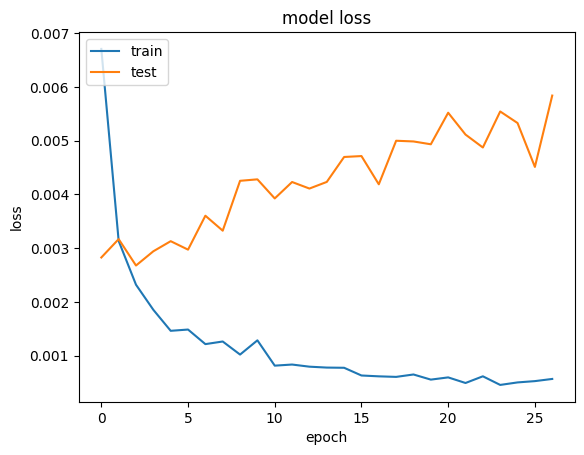

In [ ]:
#View Loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

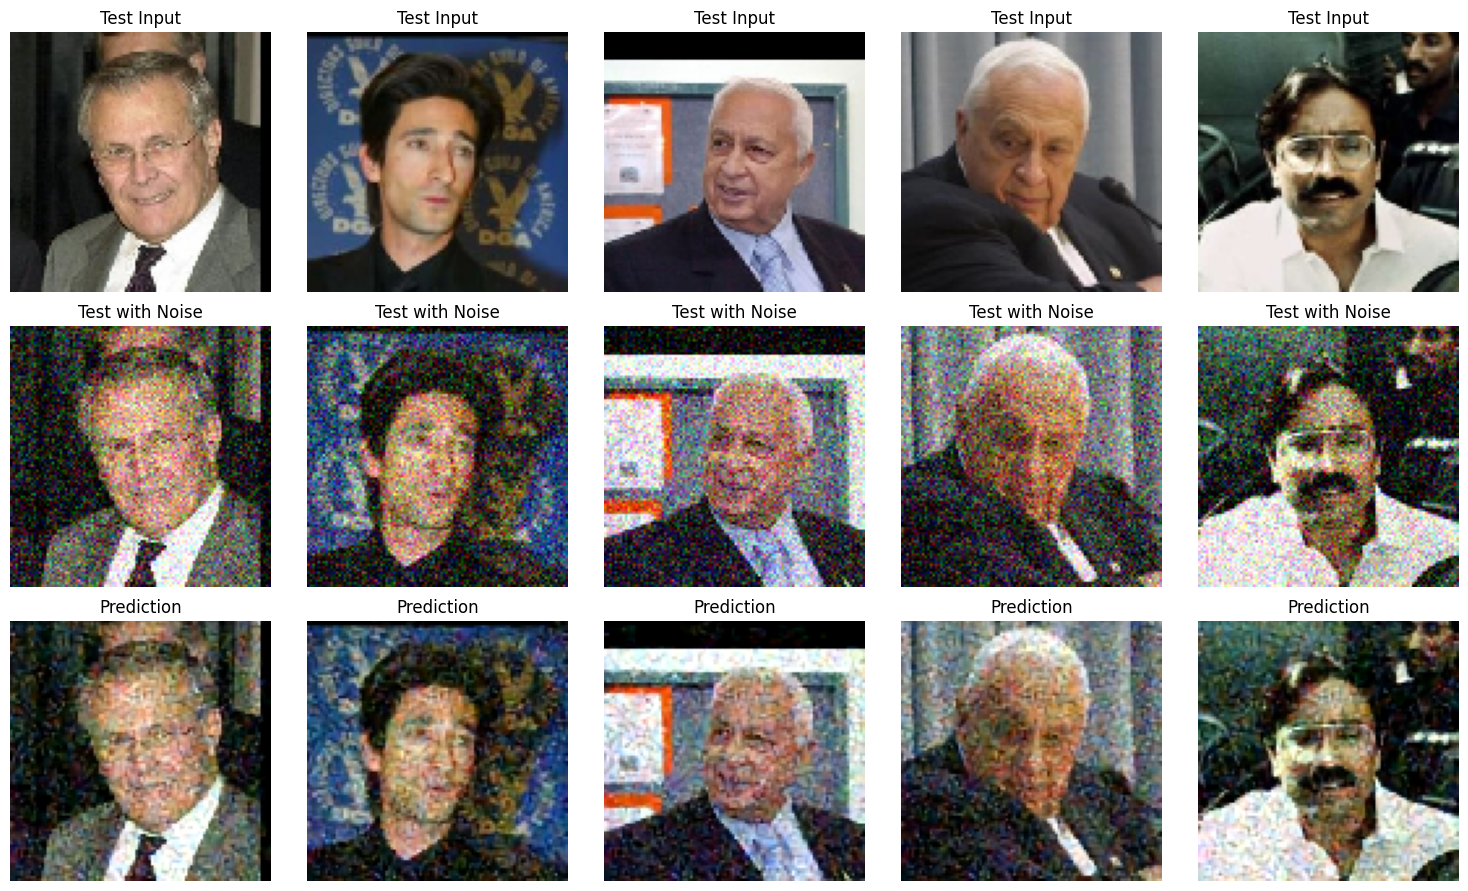

In [ ]:
# Display Result image
num_images = 5

# Create subplots with 3 rows and 'num_images' columns
fig, axes = plt.subplots(3, num_images, figsize=(15, 9))

# Plot original images
for i in range(num_images):
    axes[0, i].imshow(test_x_np_array[i])
    axes[0, i].set_title("Test Input")

# Plot images with noise type 1
for i in range(num_images):
    axes[1, i].imshow(test_x_noise_np_array[i])
    axes[1, i].set_title("Test with Noise")

# Plot images with predictions_test
for i in range(num_images):
    axes[2, i].imshow(predictions_test[i])
    axes[2, i].set_title("Prediction")

# Remove axis labels and ticks
for ax in axes.flatten():
    ax.axis('off')

# Display the subplots
plt.tight_layout()
plt.show()

In [ ]:
# code พวกนี้เอาไว้รันบน Apex เพื่อหา Best Parameter โดย cv = 4

# สร้าง function create_autoencoder() โดยภายในกำหนดชั้นของ Convolutional layers ตาม 4.2 step 1
def create_autoencoder(optimizer='Adam',learning_rate=0.01):

  Input_img = Input(shape=(100, 100, 3))

  # Layer#1
  x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
  # Layer#2
  x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
  x3 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x2)
  # Layer#3
  x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
  # Layer#4
  x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
  # Layer#6
  x6 = UpSampling2D(size=(2, 2))(x5)
  # Layer#5
  x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
  # Layer#7
  x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
  # Layer#8
  Decoded_img = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)

  # สร้างโมเดล autoencoder และกำหนด optimizer setting
  if optimizer == 'Adam':
    optimizer = tf.optimizers.Adam(0.001)
  if optimizer == 'RMSprop':
    optimizer = tf.optimizers.RMSprop(0.001)

  autoencoder = Model(Input_img, Decoded_img)
  autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

  return autoencoder

# สร้าง KerasRegressor Model เพื่อทำหน้าที่เชื่อมพารามิเตอร์จาก GridSearchCV ไปยัง ฟังก์ชั่นสร้าง autoencoder
model = KerasRegressor(build_fn=create_autoencoder, epochs=2, batch_size=16, verbose=0)

# สร้าง Dict ของชุดพารามิเตอร์เงื่อนไขพารามิเตอร์ตามตารางหน้าท้ายเอกสาร
opts = ['Adam', 'RMSprop']
lnR = [0.001]
bs = [2, 32]
eps = [200, 400]
param_grid = dict(batch_size=bs, epochs=eps, optimizer=opts, learning_rate=lnR)

# สร้าง parameter set (ตามเงื่อนไขใน param_grid) และจัดการ Cross Validation ด้วย GridSearchCV
# อย่าลืมเปลี่ยน cv ด้วยนะะ
grid = GridSearchCV(estimator=model, n_jobs=1, verbose= 10, cv=4, param_grid=param_grid)

# รัน grid search เพื่อ train และ ค้นหาพารามิเตอร์ที่ดีที่สุด เพื่อลด noise ในภาพอินพุท เพื่อให้ได้ใกล้เคียง ภาพเป้าหมายที่ไม่มี noise
grid_result = grid.fit(train_x_noise_np_array, train_x_np_array)

# แสดงพารามิเตอร์และ score หรือ error ที่ให้ผลลัพธ์ validation ที่ดีที่สุด
best_params = grid_result.best_params_
best_score = grid_result.best_score_
print("Best Parameters : ",best_params)
print("Best Score : ",best_score)

# แสดงสถิติค่าเฉลี่ย (mean) และค่าเบี่ยงเบนมําตรฐําน (stds) ของค่า score ในแต่ละค่าพารามิเตอร์
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):

    print(f"Mean: {mean}, Std: {std}, Params: {param}")

# code พวกนี้เอาไว้รันบน Apex

In [ ]:
# result from previous code

/bin/bash: /home/dip_14/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam
2023-09-29 02:04:39.512077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 02:04:40.482105: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38258 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:b7:00.0, compute capability: 8.0
2023-09-29 02:04:43.717053: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
[CV 1/4; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=12.9min
[CV 2/4; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 2/4; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=13.8min
[CV 3/4; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 3/4; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=13.8min
[CV 4/4; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 4/4; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=14.0min
[CV 1/4; 2/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 1/4; 2/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=15.2min
[CV 2/4; 2/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 2/4; 2/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.002 total time=16.6min
[CV 3/4; 2/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 3/4; 2/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=16.3min
[CV 4/4; 2/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 4/4; 2/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=16.6min
[CV 1/4; 3/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 1/4; 3/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=25.7min
[CV 2/4; 3/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 2/4; 3/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=27.7min
[CV 3/4; 3/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 3/4; 3/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=27.8min
[CV 4/4; 3/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 4/4; 3/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=27.6min
[CV 1/4; 4/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 1/4; 4/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=30.1min
[CV 2/4; 4/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 2/4; 4/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=33.1min
[CV 3/4; 4/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 3/4; 4/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=33.0min
[CV 4/4; 4/8] START batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 4/4; 4/8] END batch_size=2, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=32.6min
[CV 1/4; 5/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 1/4; 5/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time= 5.2min
[CV 2/4; 5/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 2/4; 5/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time= 5.2min
[CV 3/4; 5/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 3/4; 5/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time= 5.2min
[CV 4/4; 5/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam
[CV 4/4; 5/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time= 5.3min
[CV 1/4; 6/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 1/4; 6/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.002 total time= 5.3min
[CV 2/4; 6/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 2/4; 6/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.002 total time= 5.3min
[CV 3/4; 6/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 3/4; 6/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.002 total time= 5.4min
[CV 4/4; 6/8] START batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop
[CV 4/4; 6/8] END batch_size=32, epochs=200, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time= 5.3min
[CV 1/4; 7/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 1/4; 7/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=10.2min
[CV 2/4; 7/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 2/4; 7/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=10.4min
[CV 3/4; 7/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 3/4; 7/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=10.4min
[CV 4/4; 7/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam
[CV 4/4; 7/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=Adam;, score=-0.000 total time=10.4min
[CV 1/4; 8/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 1/4; 8/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=10.4min
[CV 2/4; 8/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 2/4; 8/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.002 total time=10.6min
[CV 3/4; 8/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 3/4; 8/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.001 total time=10.6min
[CV 4/4; 8/8] START batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop
[CV 4/4; 8/8] END batch_size=32, epochs=400, learning_rate=0.001, optimizer=RMSprop;, score=-0.003 total time=10.6min
Best Parameters :  {'batch_size': 2, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Best Score :  -0.0002668124325282406
Mean: -0.00027323411995894276, Std: 4.90399651270892e-05, Params: {'batch_size': 2, 'epochs': 200, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Mean: -0.0009480738954152912, Std: 0.0004103200865324428, Params: {'batch_size': 2, 'epochs': 200, 'learning_rate': 0.001, 'optimizer': 'RMSprop'}
Mean: -0.0002668124325282406, Std: 4.7552102301499426e-05, Params: {'batch_size': 2, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Mean: -0.0009538183949189261, Std: 0.00019337138034056104, Params: {'batch_size': 2, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'RMSprop'}
Mean: -0.00043334880319889635, Std: 4.9644956055402714e-05, Params: {'batch_size': 32, 'epochs': 200, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Mean: -0.0018556264985818416, Std: 0.00031067933774800736, Params: {'batch_size': 32, 'epochs': 200, 'learning_rate': 0.001, 'optimizer': 'RMSprop'}
Mean: -0.0003209995265933685, Std: 3.7213931069107884e-05, Params: {'batch_size': 32, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Mean: -0.0016124014800880104, Std: 0.000771718595162416, Params: {'batch_size': 32, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'RMSprop'}


In [ ]:
Best Parameters :  {'batch_size': 2, 'epochs': 400, 'learning_rate': 0.001, 'optimizer': 'Adam'}

In [ ]:
# กำหนด Training parameter ตามค่าที่ได้จาก best_params_
e = 400
b = 2
o = 'Adam'
l = 0.001

# # กำหนด optimizer setting
autoencoder = Model(Input_img, Decoded_img)
autoencoder.compile(optimizer=o, loss='mse')

In [ ]:
# Train model ด้วยค่าพารามิเตอร์ที่ดีที่สุด
print(f"Training with {e} epochs and batch size {b}")

callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(train_x_noise_np_array, train_x_np_array,
                          epochs=e,
                          batch_size=b,
                          shuffle=True,
                          validation_data=(val_x_noise_np_array, val_x_np_array),
                          callbacks=[callback], verbose=1)

# ไม่ได้รันเพราะ best parameter มันได้มาเหมือนกัน

In [ ]:
# ทดสอบ autoencoder model ด้วย validation_data และ test_data
predictions_test = np.array(autoencoder.predict(test_x_noise_np_array))

# ไม่ได้รันเพราะ best parameter มันได้มาเหมือนกัน

In [ ]:
#View Loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ไม่ได้รันเพราะ best parameter มันได้มาเหมือนกัน

In [ ]:
# Display Result image
num_images = 5

# Create subplots with 3 rows and 'num_images' columns
fig, axes = plt.subplots(3, num_images, figsize=(15, 9))

# Plot original images
for i in range(num_images):
    axes[0, i].imshow(test_x_np_array[i])
    axes[0, i].set_title("Test Input")

# Plot images with noise type 1
for i in range(num_images):
    axes[1, i].imshow(test_x_noise_np_array[i])
    axes[1, i].set_title("Test with Noise")

# Plot images with predictions_test
for i in range(num_images):
    axes[2, i].imshow(predictions_test[i])
    axes[2, i].set_title("Prediction")

# Remove axis labels and ticks
for ax in axes.flatten():
    ax.axis('off')

# Display the subplots
plt.tight_layout()
plt.show()


# ไม่ได้รันเพราะ best parameter มันได้มาเหมือนกัน